In [1]:
from PIL import Image
import numpy as np
from keras.models import Model
from keras.applications.vgg19 import VGG19

Using TensorFlow backend.


First, we load an input image (a cute photo of a dog) and resize it to a smaller size.

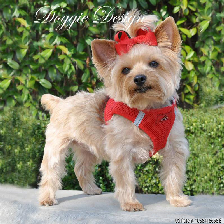

In [2]:
image_path = 'doggy.jpg'
image = Image.open(image_path)
image = image.resize((224, 224))
image

Then, we convert this image data into a tensor (multi-dimensional array) that's suitable for processing by Keras' VGG19 model.

In [3]:
array = np.asarray(image, dtype='float32')
array = np.expand_dims(array, axis=0)
array.shape

(1, 224, 224, 3)

To match the input in the VGG paper, we need to perform two transformations:

1. Subtract the mean RGB value (computed previously on the ImageNet training set and easily obtainable from Google searches) from each pixel.
2. Flip RGB ordering in the tensor we have to BGR. Because for some reason that's what the VGG paper chose to use.

In [4]:
array[:, :, :, 0] -= 103.939
array[:, :, :, 1] -= 116.779
array[:, :, :, 2] -= 123.68
array = array[:, :, :, ::-1]

As described by Gatys et al. (2015), we start our journey with the feature space provided by the 16 convolutional and 5 pooling layers of the 19 layer VGG Network. This is easy to do in Keras because it comes with a set of pretrained models. Note that by setting `include_top=False` in the code below, we don't include any of the fully connected layers.

![alt text](images/vgg-architecture.png "VGG Network Architectures")

In [5]:
model = VGG19(weights='imagenet', include_top=False)

As is clear from the table above, this model has a lot of layers. Keras has its own names for these layers and the blocks within them. Let's get these names so that we can easily refer to the individual blocks we want to later access.

In [6]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers


content_features = layers['block2_conv2'] # From Johnson, block4_conv2 in Keras, not defined in Gatys?

# base_image_features = layer_features[0, :, :, :]
# combination_features = layer_features[2, :, :, :]

{'block1_conv1': <tf.Tensor 'Relu:0' shape=(?, ?, ?, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'Relu_1:0' shape=(?, ?, ?, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'MaxPool:0' shape=(?, ?, ?, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'Relu_2:0' shape=(?, ?, ?, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'Relu_3:0' shape=(?, ?, ?, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'MaxPool_1:0' shape=(?, ?, ?, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'Relu_4:0' shape=(?, ?, ?, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'Relu_5:0' shape=(?, ?, ?, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'Relu_6:0' shape=(?, ?, ?, 256) dtype=float32>,
 'block3_conv4': <tf.Tensor 'Relu_7:0' shape=(?, ?, ?, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'MaxPool_2:0' shape=(?, ?, ?, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'Relu_8:0' shape=(?, ?, ?, 512) dtype=float32>,
 'block4_conv2': <tf.Tensor 'Relu_9:0' shape=(?, ?, ?, 512) dtype=float32>,
 'block4_conv